In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
traindf=pd.read_csv("train.csv")
valdf=pd.read_csv("val.csv")
testdf=pd.read_csv("test.csv")

In [3]:
xtrain=traindf.drop("raintomorrow", axis=1)
ytrain=traindf["raintomorrow"]

xval=valdf.drop("raintomorrow", axis=1)
yval=valdf["raintomorrow"]

xtest=testdf.drop("raintomorrow", axis=1)
ytest=testdf["raintomorrow"]

In [4]:
xtrain.head()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,...,winddir3pm_SE,winddir3pm_SSE,winddir3pm_SSW,winddir3pm_SW,winddir3pm_W,winddir3pm_WNW,winddir3pm_WSW,winddir3pm_nan,raintoday_No,raintoday_Yes
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.613208,0.701323,0.002695,0.037741,0.526244,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
model=LogisticRegression(solver='liblinear')

In [6]:
model.fit(xtrain,ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [7]:
train_pred=model.predict(xtrain)

In [9]:
accuracy_score(ytrain,train_pred)

0.8519206433440829

In [11]:
confusion_matrix(ytrain,train_pred,normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [12]:
def predict_and_plot(inputs,target,name):
    preds=model.predict(inputs)
    accuracy=accuracy_score(target,preds)
    print(f'Accuracy: {(accuracy*100):.2f}%')
    cf=confusion_matrix(target,preds,normalize='true')
    plt.figure()
    sns.heatmap(cf,annot=True,)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix')

    return preds

Accuracy: 85.19%


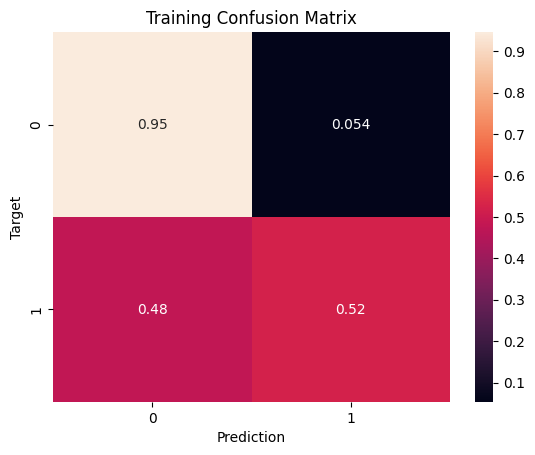

In [15]:
train_preds=predict_and_plot(xtrain,ytrain,'Training')

Accuracy: 85.40%


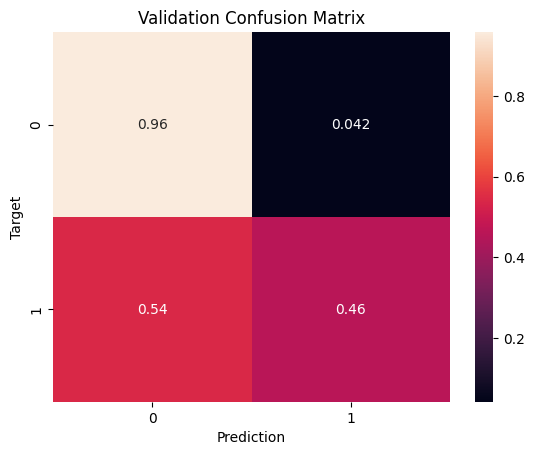

In [16]:
val_preds=predict_and_plot(xval,yval,'Validation')

Accuracy: 84.20%


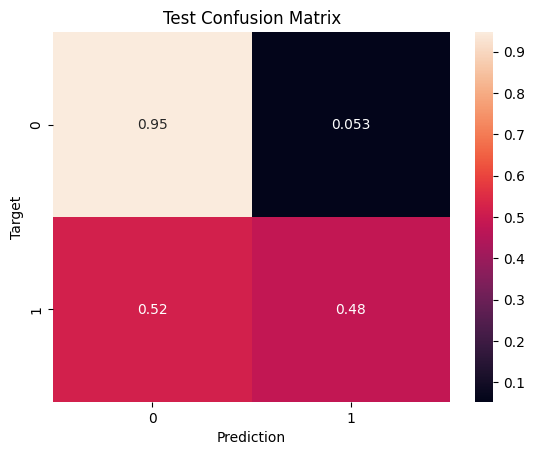

In [18]:
test_preds=predict_and_plot(xtest,ytest,'Test')

In [20]:
test_pred=model.predict(xtest)

In [21]:
report = classification_report(ytest,test_pred)


In [23]:
print(report)

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     19885
         Yes       0.73      0.48      0.58      5825

    accuracy                           0.84     25710
   macro avg       0.80      0.71      0.74     25710
weighted avg       0.83      0.84      0.83     25710

